In [36]:
import torch

def check_mps_availability():
    # MPS 사용 가능 여부를 확인합니다.
    if torch.backends.mps.is_available():
        print("이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.")
    else:
        print("MPS를 사용할 수 없습니다. CPU를 사용합니다.")

#  GPU 사용 가능 여부를 확인합니다.
check_mps_availability()

이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.


In [37]:

print(torch.__version__)  # PyTorch 버전 확인
print(torch.cuda.is_available())  # CUDA 사용 가능 여부 확인
torch.backends.mps.is_available()  # MPS 지원 여부 확인


2.6.0
False


True

**텐서 생성 및 변환**

* 텐서 생성

In [38]:
import torch
print(torch.tensor([[1,2], [3,4]])) # 2 차원 텐서 생성
print(torch.tensor([[1,2], [3,4]], device = "mps")) # GPU에 텐서 생성
print(torch.tensor([[1,2], [3,4]], dtype=torch.float64)) # dtype을 이용해 float 64 type 텐서 생성 

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='mps:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


* 텐서 `ndarray`로 변환

In [39]:
temp = torch.tensor([[1,2], [3,4]])
print(temp.numpy()) # tensor -> ndarray 변환

temp = torch.tensor([[1,2], [3,4]])
print(temp.to("cpu").numpy()) # GPU tensor -> CPU tensor -> ndarray 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


**텐서 인덱스 조작**

In [40]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) # Pytorch로 float type 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) # Indexing
print('-----------------')
print(temp[2:5], temp[4:-1]) # Slicing

tensor(1.) tensor(2.) tensor(7.)
-----------------
tensor([3., 4., 5.]) tensor([5., 6.])


**텐서 연산 및 차원 조작**

- 텐서 연산

In [41]:
v = torch.tensor([1, 2, 3]) # 길이가 3인 벡터
w = torch.tensor([3, 4, 6])

print(w - v) # 같은 길이 벡터 간 뺄셈 연산

tensor([2, 2, 3])


- 텐서 차원 조작

In [42]:
temp = torch.tensor([
    [1, 2],
    [3, 4] ]) # 2 x 2 matrix

print(temp.shape)  # 텐서 사이즈 출력
print('----------------')
print(temp.view(4, 1)) # 2 x 2 matirx -> 4 x 1 matrix로 변형
print('----------------')
print(temp.view(-1)) # 2 x 2 matrix -> 1D vector로 변형
print('----------------')
print(temp.view(1, -1)) # temp 요소 개수를 유지한 채, (1, ?) 형태로 변형 ((1, 4) 형태가 됨)
print('----------------')
print(temp.view(-1, 1)) # temp 요소 개수를 유지한 채, (?, 1) 형태로 변형 ((4, 1) 형태가 됨)

torch.Size([2, 2])
----------------
tensor([[1],
        [2],
        [3],
        [4]])
----------------
tensor([1, 2, 3, 4])
----------------
tensor([[1, 2, 3, 4]])
----------------
tensor([[1],
        [2],
        [3],
        [4]])


### 모델 정의

**단순 신경망을 정의하는 방법**

In [43]:
import torch.nn as nn
model = nn.Linear(in_features = 1, out_features = 1, bias = True)

**nn.Module()을 상속하여 정의하는 방법**

In [44]:
class MLP(nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = Linear(inputs, 1)  # 계층 정의
        self.activation = Sigmoid() # 활성화 함수 정의
    
    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X

**Sequential 신경망을 정의하는 방법**

In [45]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self): # 모델에서 사용될 모듈 정의
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(2)        
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x): # 실행될 연산 정의
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1) # (?, 1) 형태로 변경
        x = self.layer3(x)
        return x

model = MLP()

print("Printing Children \n--------------------------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n--------------------------")
print(list(model.modules()))

Printing Children 
--------------------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
--------------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): 

**함수로 신경망 정의**

In [46]:
def MLP(in_features = 1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features,
                       bias = True)
    activation = nn.ReLU()
    output=nn.Linear(in_features=hidden_features, out_features=out_features,
                     bias = True)
    net = nn.Sequential(hidden, activation, output)
    return net

### 모델 평가

- **함수를 이용**

In [47]:
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim = -1)
target = torch.randint(5, (10,)) # 정답 레이블

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5) 
# model 평가를 위해 torchmetrics, functional accuracy 사용

print(acc)

tensor(0.3000)


- **모듈을 이용**

In [48]:
import torch
import torchmetrics
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5) # model 평가 초기화

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,)) # 정답 레이블

    acc = metric(preds, target)
    print(f"Accuracy on batch {i}: {acc}") # Accuracy at the cureent batch

acc = metric.compute()
print(f"Accuracy on all data: {acc}") # Accuracy at all the batches

Accuracy on batch 0: 0.20000000298023224
Accuracy on batch 1: 0.10000000149011612
Accuracy on batch 2: 0.4000000059604645
Accuracy on batch 3: 0.4000000059604645
Accuracy on batch 4: 0.10000000149011612
Accuracy on batch 5: 0.20000000298023224
Accuracy on batch 6: 0.30000001192092896
Accuracy on batch 7: 0.4000000059604645
Accuracy on batch 8: 0.10000000149011612
Accuracy on batch 9: 0.20000000298023224
Accuracy on all data: 0.23999999463558197


### 파이토치 코드 맛보기

**필요한 라이브러리 호출**

In [49]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**데이터 호출**

In [50]:
PATH = os.getcwd()
data_path = os.path.join(PATH,'Pytorch textbook/chap02/data/car_evaluation.csv')
dataset = pd.read_csv(data_path) # 파일 호출
dataset.head() # 데이터 셋의 첫 5줄 확인

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [51]:
print(f"Data size: {dataset.shape}\n")
print(f"Data features: {dataset.columns}\n\n")
print(dataset.info)

Data size: (1728, 7)

Data features: Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')


<bound method DataFrame.info of       price  maint  doors persons lug_capacity safety output
0     vhigh  vhigh      2       2        small    low  unacc
1     vhigh  vhigh      2       2        small    med  unacc
2     vhigh  vhigh      2       2        small   high  unacc
3     vhigh  vhigh      2       2          med    low  unacc
4     vhigh  vhigh      2       2          med    med  unacc
...     ...    ...    ...     ...          ...    ...    ...
1723    low    low  5more    more          med    med   good
1724    low    low  5more    more          med   high  vgood
1725    low    low  5more    more          big    low  unacc
1726    low    low  5more    more          big    med   good
1727    low    low  5more    more          big   high  vgood

[1728 rows x 7 columns]>


In [52]:
dataset['output'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

- 총 7개의 features 

    - price(자동차 가격)
    - maint(자동차 유지 비용)
    - doors(자동차 문 개수)
    - persons(수용 인원)
    - lug_capacity (수하물 용량)
    - safety (안전성)
    - **output (차 상태)**: 범주형 데이터, unacc (허용 불가능한 수준), acc (허용 가능한 수준), good (양호), vgood (매우 좋음) 중 하나의 값을 가짐 

**목표: 차 상태를 예측하는 코드를 구현**

**데이터 분포 확인**

<Axes: ylabel='count'>

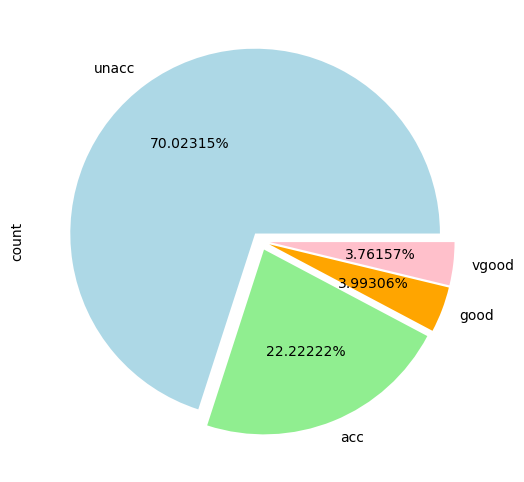

In [53]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"]= fig_size
dataset.output.value_counts().plot(kind = 'pie', autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                   explode = (0.05, 0.05, 0.05, 0.05))

대부분의 자동차 (약 70%)가 허용 불가능한 상태였고, 20%만 허용 가능함. 양호한 상태의 자동차 비율이 매우 낮음. 

**데이터 전처리**

- 모든 데이터 칼럼들이 범주형 데이터임
- 단어를 숫자 (텐서)로 변환해야함


변환 순서


**범주형 -> dataset[category] -> numpy array -> Tensor**

In [54]:
categorical_columns = dataset.columns[:-1]

#astype()으로 데이터를 범주형으로 변환
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category') 

# 범주형 데이터를 numpy array로 바꾸기 위해 cat.codes를 사용
# cat.codes는 어떤 클래스가 어떤 숫자로 매핑되는지 확인하기 어려움
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

# numpy 객체들을 column-wise stacking
categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [55]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype = torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [56]:
# label(outputs)로 사용할 컬럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output) # get_dummies를 이용해 넘파이 배열로 변환
print(outputs[:10])
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환
print("-------------------------------")
print(outputs[:10])

print(categorical_data.shape)
print(outputs.shape)

     acc   good  unacc  vgood
0  False  False   True  False
1  False  False   True  False
2  False  False   True  False
3  False  False   True  False
4  False  False   True  False
5  False  False   True  False
6  False  False   True  False
7  False  False   True  False
8  False  False   True  False
9  False  False   True  False
-------------------------------
tensor([False, False,  True, False, False, False,  True, False, False, False])
torch.Size([1728, 6])
torch.Size([6912])


**워드 임베딩**: 유사한 단어 끼리 유사하게 인코딩되도록 표현하는 방법
- 높은 차원의 임베딩일 수록 단어간의 세부적인 관계를 잘 파악할 수 있음
- 단일 숫자로 변환된 넘파이 배열을 N 차원으로 변경해 사용함


- 배열을 N 차원으로 변환하기 위해 먼저 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의함
    - 임베딩 크기에 대환 정확한 규칙은 x, 각 칼럼의 고유값 수를 2로 나누는 것을 많이 사용

**범주형 칼럼을 N차원으로 변환**

In [57]:
categorical_columns_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
# 각 범주형 칼럼이 가지는 고유값의 개수를 가져옴

categorical_embedding_sizes = [(col_size, min(50, (col_size + 1)//2)) for col_size in categorical_columns_sizes]
# 각 범주형 칼럼의 (고유값 개수, 임베딩 크기) 튜플을 리스트로 저장
# 임베딩 크기 = 칼럼 고유 값 수 / 2
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


**데이터셋 분리**

In [58]:
total_records = categorical_data.shape[0]
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records - test_records: total_records]

train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records - test_records: total_records]


**데이터셋 분리 확인**

In [59]:
print(len(categorical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


**모델 네트워크 생성**

In [60]:
class Model(nn.Module): # class 형태로 구현되는 모델은 nn.Module을 상속받음
    def __init__(self, embedding_size, output_size, layers, p = 0.4): 
        # 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용, 객체 생성시 자동 호출
        '''
        embedding_size: 범주형 칼럼 임베딩 크기
        output_size: 출력층 크기
        layers: 모든 계층에 대한 목록
        p: dropout (default = 0.5)
        '''
        super().__init__() # Parent class (Model 클래스)에 접근할 때 사용
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                         nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum(nf for ni, nf in embedding_size)
        input_size = num_categorical_cols # 입력층 크기를 찾기 위해 범주형 칼럼 개수를 input_size에 저장

        for i in layers:
        # 모델의 네트워크 계층을 구축하기 위해 for 문을 이용해 각 계층을 all_layers 목록에 추가
            all_layers.append(nn.Linear(input_size, i)) # 선형 계층
            all_layers.append(nn.ReLU(inplace = True)) # 활성화 함수
            all_layers.append(nn.BatchNorm1d(i)) # 배치 정규화 
            all_layers.append(nn.Dropout(p)) # 과적합 방지
            input_size = i
        
        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers) # 신경망의 모든 계층이 순차적으로 실행되도록 모든 계층에 대한 목록을 nn.Sequential로 전달

    def forward(self, x_categorical): # 학습 데이터를 입력 받아 연산 진행
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

**Model 클래스 객체 생성**

In [61]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p = 0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


**손실 함수와 옵티마이저 정의**
- Optimizer: Adam
- Loss Function: cross entropy

In [62]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**CPU/GPU 사용 지정**
- GPU available -> Use GPU
- GPU unavailable -> Use CPU instead

In [63]:
if torch.torch.backends.mps.is_available():
    device = torch.device('mps') # M3 사용, cuda 대신 GPU로 mps 사용
else:
    device = torch.device('cpu') # GPU가 없다면 CPU tkdyd

**모델 학습**

In [64]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device = device, dtype = torch.int64)

for i in range(epochs): # 500회 반복, 각 반복마다 손실함수가 오차 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1: # 25 에포크마다 오차 정보 출력
        print(f"epoch: {i:3} loss: {single_loss.item():10.8f}")
    
    optimizer.zero_grad()
    single_loss.backward() # 역전파 학습, 가중치 업데이트
    optimizer.step() # 기울기 업데이트 

print(f"epoch: {i:3} loss: {single_loss.item():10.10f}")

epoch:   1 loss: 1.65991139
epoch:  26 loss: 1.48085570
epoch:  51 loss: 1.41092110
epoch:  76 loss: 1.27630699
epoch: 101 loss: 1.11565197
epoch: 126 loss: 0.97166258
epoch: 151 loss: 0.83449942
epoch: 176 loss: 0.75506914
epoch: 201 loss: 0.68520504
epoch: 226 loss: 0.64642185
epoch: 251 loss: 0.62704074
epoch: 276 loss: 0.61573607
epoch: 301 loss: 0.61562240
epoch: 326 loss: 0.60330647
epoch: 351 loss: 0.59921271
epoch: 376 loss: 0.58883893
epoch: 401 loss: 0.59137899
epoch: 426 loss: 0.58666658
epoch: 451 loss: 0.58786637
epoch: 476 loss: 0.57609123
epoch: 500 loss: 0.5683358312


**테스트 데이터셋으로 모델 예측**

In [65]:
test_outputs = test_outputs.to(device=device, dtype = torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device)
    loss = loss_function(y_val, test_outputs)
print(f"Loss: {loss: .8f}") # 테스트 용도의 데이터셋에 대한 손실값 출력

Loss:  0.56812292


테스트 데이터셋의 손실값과 훈련 데이터셋의 손실값이 비슷하므로 과적합이 발생하지 않았다고 판단

**모델 예측 확인**
- 테스트 데이터 셋을 이용해 모델 예측
- 모델 네트워크에서 output_size = 4로 지정
- 출력층에 네 개의 뉴런이 포함되도록 지정했으므로 각 예측에는 네 개의 값이 포함될 것

In [66]:
print(y_val[:5]) # 처음 다섯 개의 값을 출력

tensor([[ 3.8457,  2.6813, -4.6594, -4.6799],
        [ 3.9892,  2.4993, -3.9368, -4.0233],
        [ 2.9905,  1.9133, -4.2799, -4.4090],
        [ 2.4105,  1.4158, -2.9928, -3.0915],
        [ 2.4660,  1.3706, -3.2338, -2.9894]], device='mps:0')


값이 출력되었지만, 이게 어떤 의미인지 파악하기 어려움. 실제 출력이 0이라면 인덱스 0의 값이 인덱스 1의 값보다 높아야함.

In [67]:
# 가장 큰 값을 갖는 인덱스 확인
y_val_numpy = y_val.cpu().numpy() # Tensor에서 NumPy로 변환
y_val_numpy = np.argmax(y_val_numpy, axis = 1)
print(y_val_numpy[:5])

[0 0 0 0 0]


출력 결과 모두 인덱스 0이 출력됨. 인덱스가 0인 값이 인덱스가 1인 값보다 크므로 처리된 출력이 모두 0이라고 볼 수 있음. 

**정확도, 정밀도, 재현율**
-  `classification_report`,`confusion_matrix`, `accuracy_score` 클래스 사용

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# test_outputs도 Numpy 변환이 필요함
if isinstance(test_outputs, torch.Tensor):
    test_outputs_numpy = test_outputs.cpu().numpy()
else:
    test_outputs_numpy = test_outputs  # 이미 NumPy라면 그대로 사용


print(confusion_matrix(test_outputs_numpy, y_val_numpy))
print(classification_report(test_outputs_numpy, y_val_numpy))
print(accuracy_score(test_outputs_numpy, y_val_numpy))

[[259   0]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7507246376811594


/opt/anaconda3/envs/euron/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/euron/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/euron/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


정확도가 75% 정도로, 모든 파라미터를 무작위로 선택한 것을 고려하면 나쁘지 않은 결과이다. 파라미터를 변경해가면서 더 나은 성능을 찾는 것도 도움이 될 것이다. 

In [69]:
import numpy as np
a = np.array([[1,2], [3,4]]) # (2,2)
b = np.array([[5,6], [7,8]]) # (2,2)
c = np.array([[5,6], [7,8], [9,10]]) # (3,2)

print(np.concatenate((a, b), axis = 0)) # (4,2)
print("------------------")
print(np.stack((a, b), axis = 0)) # (2, 2, 2)
print(np.stack((a, b), axis = 1))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[[1 2]
  [5 6]]

 [[3 4]
  [7 8]]]
